In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client = MongoClient()
db = client['la_parking']
tickets = db['citations']
tickets.find_one()

{'_id': ObjectId('6293c7ddf7378150d20b823b'),
 'Ticket number': '1103341116',
 'Issue Date': '2015-12-21T00:00:00.000',
 'Issue time': '1251',
 'RP State Plate': 'CA',
 'Plate Expiry Date': '200304',
 'Make': 'HOND',
 'Body Style': 'PA',
 'Color': 'GY',
 'Location': '13147 WELBY WAY',
 'Route': '01521',
 'Agency': '1',
 'Violation code': '4000A1',
 'Violation Description': 'NO EVIDENCE OF REG',
 'Fine amount': '50',
 'Latitude': '99999',
 'Longitude': '99999'}

In [6]:
res = tickets.aggregate([{'$group': {'_id': '$RP State Plate', 'count': {'$sum': 1}}}])

#res = tickets.find({'RP State Plate': {'$ne': 'CA'}})

In [7]:
df = pd.DataFrame(list(res))
df.rename(columns={'_id': 'state'}, inplace=True)
df = df[df['state'] != 'CA']

In [8]:
df.sort_values(by=['count'], inplace=True)
df

,state,count
24,PN,1
16,ML,1
5,|,2
38,YU,12
41,NF,15
...,...,...
22,WA,52763
71,FL,59799
59,NV,74673
42,TX,82998


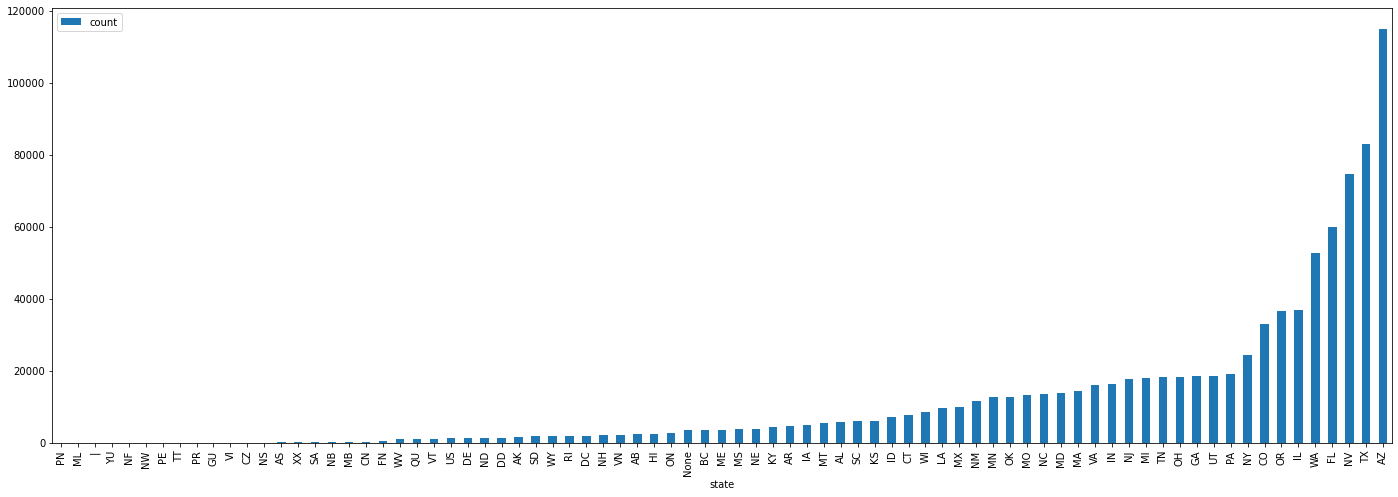

In [29]:
ax = df.plot.bar(x='state', y='count', figsize=(24,8))